<a href="https://colab.research.google.com/github/Hemasri-data/Predicting-Recidivism-through-survival-models/blob/main/MODEL_ADEQUACY_CHECKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c915a2d91f0f1e706edfb4b038b47c2dc075177b7f03a67acd28192f3feece60
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


Proportional hazard assumption looks okay.


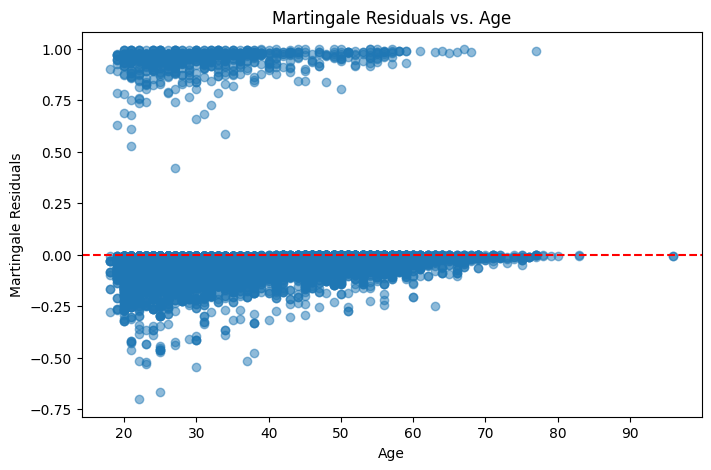

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Load dataset
file_path = "/content/FINAL FILE.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Select relevant columns for survival analysis
columns = ["duration", "event", "age", "priors_count", "decile_score"]  # Modify as per dataset
df_cox = df[columns].copy()

# Ensure 'event' column is binary (0 or 1)
df_cox["event"] = df_cox["event"].astype(int)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col="duration", event_col="event",formula="age + priors_count + decile_score")

# 1. Test the Proportional Hazards Assumption (Schoenfeld residuals test)
cph.check_assumptions(df_cox, p_value_threshold=0.05)

# 2. Martingale Residuals for Functional Form Check
df_cox["martingale_residuals"] = cph.compute_residuals(df_cox, kind="martingale")['martingale']

# Plot Martingale Residuals against Age
plt.figure(figsize=(8, 5))
plt.scatter(df_cox["age"], df_cox["martingale_residuals"], alpha=0.5)
plt.axhline(y=0, color='r', linestyle="--")
plt.xlabel("Age")
plt.ylabel("Martingale Residuals")
plt.title("Martingale Residuals vs. Age")
plt.show()

# 3. Deviance Residuals for Influential Observations
deviance_residuals_df = cph.compute_residuals(df_cox, kind="deviance")
df_cox["deviance_residuals"] = deviance_residuals_df['deviance']

# Plot Deviance Residuals
plt.figure(figsize=(8, 5))
plt.scatter(range(len(df_cox)), df_cox["deviance_residuals"], alpha=0.5)
plt.axhline(y=0, color='r', linestyle="--")
plt.xlabel("Observation Index")
plt.ylabel("Deviance Residuals")
plt.title("Deviance Residuals for Outlier Detection")
plt.show()


In [ ]:
!pip install lifelines scikit-survival


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 15.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1bc8ee02fea8cd9d577f76285e398421a0c31ee1e8338052684e85b042136512
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=755b58d70219b29cde8160e9c895fd6859cab90c9991bed2b3fcbd74281cd39a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


**MODEL ADEQUACY** **CHECKS**

In [ ]:
import pandas as pd
from lifelines import WeibullFitter, ExponentialFitter, LogLogisticFitter

# Load the dataset
file_path = "/content/FINAL FILE.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Replace zero and negative durations with a small positive value (e.g., 1e-6)
df['duration'] = df['duration'].apply(lambda x: x if x > 0 else 1e-6)
# If 'time' column exists and is used for fitting:
if 'time' in df.columns:
    df['time'] = df['time'].apply(lambda x: x if x > 0 else 1e-6)

# Fit different parametric models
weibull = WeibullFitter().fit(df['time'], df['event'])
exponential = ExponentialFitter().fit(df['time'], df['event'])
loglogistic = LogLogisticFitter().fit(df['time'], df['event'])

# Compare AIC values
print("Weibull AIC(using 'time'):", weibull.AIC_)
import pandas as pd
from lifelines import WeibullFitter, ExponentialFitter, LogLogisticFitter

# Load the dataset
file_path = "/content/FINAL FILE.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Replace zero and negative durations with a small positive value (e.g., 1e-6)
df['duration'] = df['duration'].apply(lambda x: x if x > 0 else 1e-6)
# If 'time' column exists and is used for fitting:
if 'time' in df.columns:
    df['time'] = df['time'].apply(lambda x: x if x > 0 else 1e-6)
    # Fit different parametric models
    weibull = WeibullFitter().fit(df['time'], df['event'])
    exponential = ExponentialFitter().fit(df['time'], df['event'])
    loglogistic = LogLogisticFitter().fit(df['time'], df['event'])

    # Compare AIC values
    print("Weibull AIC(using 'time'):", weibull.AIC_)
    print("Exponential AIC(using 'time'):", exponential.AIC_)
    print("Log-Logistic AIC(using 'time'):", loglogistic.AIC_)
else:  # Added an else block for clarity
    print("'time' column not found in dataframe. Using 'duration' column for fitting.")

    # Fit different parametric models
    weibull = WeibullFitter().fit(df['duration'], df['event'])
    exponential = ExponentialFitter().fit(df['duration'], df['event'])
    loglogistic = LogLogisticFitter().fit(df['duration'], df['event'])

    # Compare AIC values
    print("Weibull AIC:", weibull.AIC_)
    print("Exponential AIC:", exponential.AIC_)
    print("Log-Logistic AIC:", loglogistic.AIC_)

# Fit different parametric models
weibull = WeibullFitter().fit(df['duration'], df['event'])
exponential = ExponentialFitter().fit(df['duration'], df['event'])
loglogistic = LogLogisticFitter().fit(df['duration'], df['event'])

# Compare AIC values
    print("Weibull AIC:", weibull.AIC_)
    print("Exponential AIC:", exponential.AIC_)
    print("Log-Logistic AIC:", loglogistic.AIC_)

IndentationError: unexpected indent (<ipython-input-11-79d9b867eaa4>, line 61)

In [ ]:
!pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


**DEEPHIT WITH PLOTS**

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


Epoch 10/50, Loss: 1.9813
Epoch 20/50, Loss: 1.6786
Epoch 30/50, Loss: 1.3946
Epoch 40/50, Loss: 1.1296
Epoch 50/50, Loss: 0.8904
Harrell’s C-Index: 0.4935


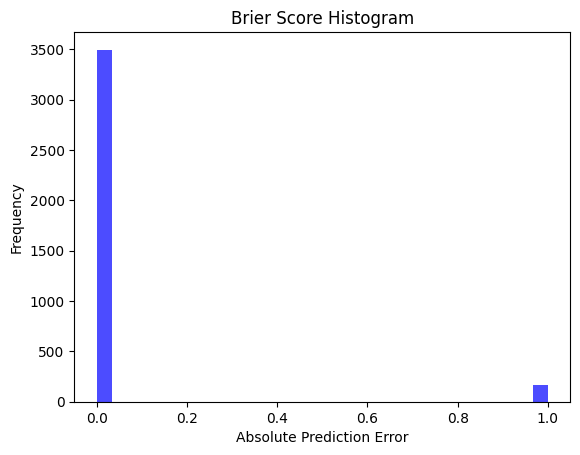

AUC scores could not be calculated, check input values.


Permutation explainer: 3665it [01:31, 39.64it/s]                          
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


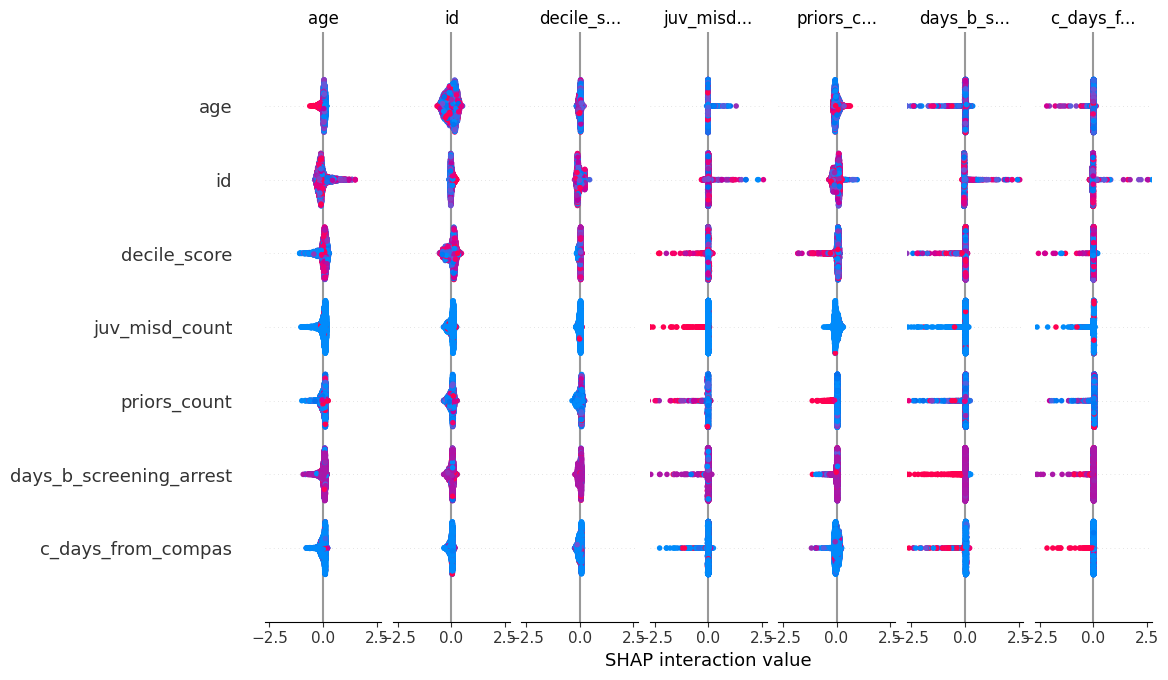

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sksurv.metrics import concordance_index_censored, cumulative_dynamic_auc
import shap

# Load dataset
df = pd.read_csv("/content/FINAL FILE.csv")

time_col, event_col = df.columns[-2], df.columns[-1]
X = df.drop(columns=[time_col, event_col])
y_time, y_event = df[time_col], df[event_col]

# Convert event data to structured array
y_structured = np.array([(bool(e), t) for e, t in zip(y_event, y_time)], dtype=[('event', bool), ('time', float)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_structured, test_size=0.2, random_state=42)

# Select numeric features and scale
numeric_features = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Convert to PyTorch tensors
X_train, X_test = torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(X_test_scaled, dtype=torch.float32)
y_time_train = torch.tensor([t[1] for t in y_train], dtype=torch.float32)
y_time_test = torch.tensor([t[1] for t in y_test], dtype=torch.float32)
y_event_train = torch.tensor([t[0] for t in y_train], dtype=torch.bool)
y_event_test = torch.tensor([t[0] for t in y_test], dtype=torch.bool)

# Adjust num_time_bins dynamically
num_time_bins = min(100, len(np.unique(y_time_train.numpy())))

def normalize_time_bins(y_time, num_time_bins):
    return torch.clamp(torch.floor((y_time / y_time.max()) * (num_time_bins - 1)).long(), max=num_time_bins - 1)

y_time_train_bins = normalize_time_bins(y_time_train, num_time_bins)
y_time_test_bins = normalize_time_bins(y_time_test, num_time_bins)

# Define DeepHit Model
class DeepHit(nn.Module):
    def __init__(self, input_size, num_time_bins): # Corrected to __init__
        super(DeepHit, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, num_time_bins)
        self.relu = nn.ReLU() # Added ReLU activation

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss, and optimizer
model = DeepHit(X_train.shape[1], 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_time_train_bins)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate model
with torch.no_grad():
    predictions = model(X_test)
    predicted_times = torch.argmax(predictions, dim=1)

    # Harrell’s C-Index
    harrell_c_index = concordance_index_censored(
        y_event_test.cpu().numpy(),
        y_time_test.cpu().numpy().astype(float),
        predicted_times.cpu().numpy().astype(float))[0]
    print(f"Harrell’s C-Index: {harrell_c_index:.4f}")

    # Brier Score Plot
    plt.figure()
    plt.hist(np.abs(predicted_times.cpu().numpy() - y_time_test.cpu().numpy()), bins=30, alpha=0.7, color='blue')
    plt.xlabel("Absolute Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Brier Score Histogram")
    plt.show()

    # Dynamic AUC Calculation
    times = np.unique(y_time_test.cpu().numpy())
    times = times[(times > 0) & (times < np.max(y_time_test.cpu().numpy()))]  # Avoid zero values

    if len(times) > 1:
        auc_scores = cumulative_dynamic_auc(
            y_train, y_test, predicted_times.cpu().numpy(), times)

        plt.plot(times, auc_scores[1], marker='o', linestyle='-')
        plt.xlabel("Time")
        plt.ylabel("AUC")
        plt.title("Cumulative Dynamic AUC")
        plt.show()
    else:
        print("AUC scores could not be calculated, check input values.")

    # Model Calibration
    pred_survival = predictions.cpu().numpy().mean(axis=1)
    obs_survival = y_event_test.cpu().numpy()
    sns.regplot(x=pred_survival, y=obs_survival, ci=None, line_kws={"color": "red"})
    plt.xlabel("Predicted Survival Probability")
    plt.ylabel("Observed Survival Rate")
    plt.title("Model Calibration: Predicted vs Observed Survival")
    plt.show()

# SHAP Analysis

def model_wrapper(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        return model(x_tensor).numpy()

explainer = shap.Explainer(model_wrapper, X_test.cpu().numpy())
shap_values = explainer(X_test.cpu().numpy())

# Plot SHAP summary
shap.summary_plot(shap_values, X_test.cpu().numpy(), feature_names=numeric_features)